- Taller 1 finanzas computacionales
- Juan Manuel Torres Ladino
- Santiago Morales Morales

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf
yf.pdr_override()
!pip install pandas-datareader
import pandas_datareader.data as pdr
from pandas_datareader import wb
from datetime import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 640.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 13.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
start = pd.to_datetime("2021-1-1")
end = pd.to_datetime("2022-12-31")


1. Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos
acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando
pandas datareader. Con esta información:

a. Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los
resultados en una tabla.

In [3]:
precios = pdr.DataReader(['RACE', 'UL'], start, end )['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
retornos #RETORNOS DIARIOS

[*********************100%***********************]  2 of 2 completed


,RACE,UL
Date,,
2021-01-05,-0.004105,0.000496
2021-01-06,-0.019338,0.001485
2021-01-07,0.001577,-0.013780
2021-01-08,-0.018770,0.011799
2021-01-11,-0.000046,-0.016827
...,...,...
2022-12-23,-0.007319,0.004120
2022-12-27,0.004681,0.000783
2022-12-28,-0.008289,-0.012997


In [4]:
retornos*np.sqrt(21)
#RETORNOS MENSUALES

,RACE,UL
Date,,
2021-01-05,-0.018812,0.002271
2021-01-06,-0.088619,0.006805
2021-01-07,0.007228,-0.063146
2021-01-08,-0.086017,0.054070
2021-01-11,-0.000210,-0.077110
...,...,...
2022-12-23,-0.033539,0.018882
2022-12-27,0.021450,0.003588
2022-12-28,-0.037985,-0.059562


In [5]:
retornos*np.sqrt(252)
#RETORNOS ANUALES

,RACE,UL
Date,,
2021-01-05,-0.065166,0.007867
2021-01-06,-0.306986,0.023572
2021-01-07,0.025037,-0.218744
2021-01-08,-0.297970,0.187305
2021-01-11,-0.000727,-0.267117
...,...,...
2022-12-23,-0.116182,0.065410
2022-12-27,0.074305,0.012429
2022-12-28,-0.131583,-0.206328


b. Calcule los retornos esperados y volatilidades anualizadas.

In [6]:
p_name = pdr.DataReader(['RACE'], start, end )['Adj Close'].dropna()
r_name = np.log(p_name/p_name.shift(1)).dropna()
sigma = r_name.std()
sigma*np.sqrt(252)
#VOLATILIDAD ANUALIZADA FERRARI

[*********************100%***********************]  1 of 1 completed


0.2959386837160197

In [7]:
p_name2 = pdr.DataReader(['UL'], start, end )['Adj Close'].dropna()
r_name2 = np.log(p_name2/p_name2.shift(1)).dropna()
sigma2 = r_name2.std()
sigma2*np.sqrt(252)
#VOLATILIDAD ANUALIZADA UNILEVER

[*********************100%***********************]  1 of 1 completed


0.24640824897790584

In [49]:
#RETORNOS ESPERADOS
retornos.mean()

RACE   -0.000092
UL     -0.000220
dtype: float64

c. Construya una tabla resumen con las estadísticas descriptivas de las series diarias
(media, mediana, desv. estándar, curtosis, simetría) de los dos activos.

In [10]:
p_name = pdr.DataReader(['RACE'], start, end, interval = '1d' )['Adj Close'].dropna()

[*********************100%***********************]  1 of 1 completed


In [11]:
p_name.describe()

count    503.000000
mean     211.748155
std       19.740990
min      168.750000
25%      197.659317
50%      210.250000
75%      218.628700
max      273.465912
Name: Adj Close, dtype: float64

In [12]:
p_name.kurtosis()

0.869948497137448

In [13]:
p_name.skew()

0.9881532979227228

In [14]:
p_name2 = pdr.DataReader(['UL'], start, end, interval = '1d' )['Adj Close'].dropna()

[*********************100%***********************]  1 of 1 completed


In [15]:
p_name2.describe()

count    503.000000
mean      49.795237
std        4.315515
min       42.296543
25%       45.362194
50%       50.470001
75%       52.929937
max       57.617676
Name: Adj Close, dtype: float64

In [16]:
p_name2.kurtosis()

-1.1356489829968923

In [17]:
p_name2.skew()

-0.014759244989849055

d. Compare las distribuciones empíricas de los dos activos con la distribución teórica
normal.

[*********************100%***********************]  1 of 1 completed


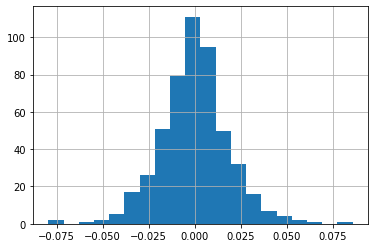

In [18]:
p_name = pdr.DataReader(['RACE'], start, end, interval = '1d' )['Adj Close'].dropna()
retornos = np.log(p_name/p_name.shift(1)).dropna()
retornos.hist(bins=20)

[*********************100%***********************]  1 of 1 completed


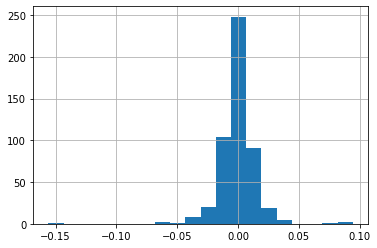

In [19]:
p_name2 = pdr.DataReader(['UL'], start, end, interval = '1d' )['Adj Close'].dropna()
retornos2 = np.log(p_name2/p_name2.shift(1)).dropna()
retornos2.hist(bins=20)

en ambas se observa una distribución normal, en los retornos de las acciones de unilever se ve un sesgo hacia la derecha

e. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.

[*********************100%***********************]  2 of 2 completed


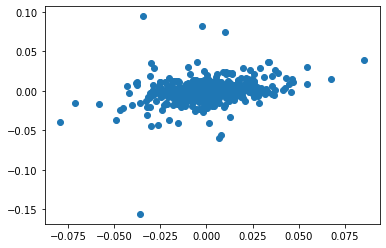

In [20]:
activos = ["RACE", "UL"]
precios = pdr.DataReader(activos, start, end, interval = '1d')['Adj Close'].dropna()
retornos = np.log(precios/precios.shift()).dropna()
plt.scatter(retornos["RACE"],retornos["UL"]);

Pearson

In [21]:
retornos.corr()

,RACE,UL
RACE,1.000000,0.294368
UL,0.294368,1.000000


In [22]:
#La correlación es positiva

In [23]:
retornos['RACE'].corr(retornos['UL'], method='pearson')

0.29436795536751365

Kendall

In [24]:
import scipy.stats as stats
stats.kendalltau(retornos['RACE'], retornos['UL'])

KendalltauResult(correlation=0.2053594513305592, pvalue=6.104816685824143e-12)

Spearman

In [25]:
stats.spearmanr(retornos['RACE'], retornos['UL'])

SpearmanrResult(correlation=0.2963299619817865, pvalue=1.2389438248323438e-11)

2. Escoja 10 acciones de su preferencia en el mercado estadounidense. Para estas
acciones descargue las series de precios mensuales para el periodo Dic-17 a Dic-2022.
Con esta información:

a. Calcule los retornos y volatilidades anualizadas.

In [26]:
start = pd.to_datetime("2017-10-31")
end = pd.to_datetime("2022-12-31")

precios10 = pdr.DataReader(['GS', 'V', 'INTC', 'RA', 'MNST', 'TMUS', 'NVDA', 'ARE', 'GOOGL', 'AMD'], start, end, interval = '1mo')['Adj Close'].dropna()
retornos10 = np.log(precios10/precios10.shift(1)).dropna()
retornos10*np.sqrt(252)
#RETORNOS ANUALIZADOS

[*********************100%***********************]  10 of 10 completed


,AMD,ARE,GOOGL,GS,INTC,MNST,NVDA,RA,TMUS,V
Date,,,,,,,,,,
2017-12-01,-0.915082,0.435011,0.261799,0.499782,0.554365,0.156277,-0.569720,0.289897,0.621909,0.228451
2018-01-01,4.605370,0.000688,1.831458,0.797770,0.666727,1.193081,3.797829,0.217059,0.392532,1.361411
2018-02-01,-2.004629,-1.061606,-1.087825,-0.296673,0.374760,-1.173029,-0.247334,-0.886104,-1.134466,-0.165702
2018-03-01,-2.959943,0.461697,-0.990578,-0.638335,0.981382,-1.623357,-0.688126,-0.045460,0.112225,-0.406973
2018-04-01,1.259699,0.076835,-0.286652,-0.876545,-0.140835,-0.625384,-0.465326,0.461171,-0.138438,0.935354
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,-1.701138,-1.232064,-1.145803,-0.034319,-2.045596,-1.819830,-2.938201,-0.689312,0.099556,-1.035946
2022-09-01,-4.639927,-1.429503,-1.960033,-1.893611,-3.238033,-0.337750,-3.458641,-1.571000,-1.118008,-1.750349
2022-10-01,-0.849106,0.701540,-0.190336,2.568176,1.559414,1.188420,1.688114,0.200446,1.934689,2.439534


VOLATILIDADES ANUALIZADAS

In [27]:
p_nameGS = pdr.DataReader(['GS'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameGS = np.log(p_nameGS/p_nameGS.shift(1)).dropna()
sigmaGS = r_nameGS.std()
sigmaGS*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


1.4576790943036932

In [28]:
p_nameV = pdr.DataReader(['V'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameV = np.log(p_nameV/p_nameV.shift(1)).dropna()
sigmaV = r_nameV.std()
sigmaV*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


1.0697855531399043

In [29]:
p_nameINTC = pdr.DataReader(['INTC'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameINTC = np.log(p_nameINTC/p_nameINTC.shift(1)).dropna()
sigmaINTC = r_nameINTC.std()
sigmaINTC*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


1.3082846518924658

In [30]:
p_nameRA = pdr.DataReader(['RA'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameRA = np.log(p_nameRA/p_nameRA.shift(1)).dropna()
sigmaRA = r_nameRA.std()
sigmaRA*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


0.9944808031234377

In [31]:
p_nameMNST = pdr.DataReader(['MNST'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameMNST = np.log(p_nameMNST/p_nameMNST.shift(1)).dropna()
sigmaMNST = r_nameMNST.std()
sigmaMNST*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


1.2651296283150177

In [32]:
p_nameTMUS = pdr.DataReader(['TMUS'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameTMUS = np.log(p_nameTMUS/p_nameTMUS.shift(1)).dropna()
sigmaTMUS = r_nameTMUS.std()
sigmaTMUS*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


1.0172105214944231

In [33]:
p_nameNVDA = pdr.DataReader(['NVDA'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameNVDA = np.log(p_nameNVDA/p_nameNVDA.shift(1)).dropna()
sigmaNVDA = r_nameNVDA.std()
sigmaNVDA*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


2.292841932487036

In [34]:
p_nameARE = pdr.DataReader(['ARE'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameARE = np.log(p_nameARE/p_nameARE.shift(1)).dropna()
sigmaARE = r_nameARE.std()
sigmaARE*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


1.0627111114156849

In [35]:
p_nameGOOGL = pdr.DataReader(['GOOGL'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameGOOGL = np.log(p_nameGOOGL/p_nameGOOGL.shift(1)).dropna()
sigmaGOOGL = r_nameGOOGL.std()
sigmaGOOGL*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


1.1784419186740083

In [36]:
p_nameAMD = pdr.DataReader(['AMD'], start, end, interval = '1mo' )['Adj Close'].dropna()
r_nameAMD = np.log(p_nameAMD/p_nameAMD.shift(1)).dropna()
sigmaAMD = r_nameAMD.std()
sigmaAMD*np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


2.718776724629154

b. Construya una tabla en la que se muestre un ranqueo de los activos de acuerdo con su
retorno esperado.

In [50]:
retornos10.mean().rank()

AMD      10.0
ARE       3.0
GOOGL     6.0
GS        4.0
INTC      1.0
MNST      5.0
NVDA      9.0
RA        2.0
TMUS      8.0
V         7.0
dtype: float64

3. Descargue la serie mensual de precios del índice estadounidense Rusell (^RUT) para el periodo
Dic-11 a Dic-2022. Con esta información calcule la volatilidad mensual y anualizada usando
las siguientes medidas:

In [38]:
start = pd.to_datetime("2011-10-31")
end = pd.to_datetime("2022-12-31")

preciosRUS = pdr.DataReader(['^RUT'], start, end, interval = '1mo')['Adj Close'].dropna()

[*********************100%***********************]  1 of 1 completed


a. Desviación estándar

In [39]:
PreciosD = pdr.DataReader(['^RUT'], start, end, interval = '1mo')['Adj Close'].dropna()
r_nameD = np.log(PreciosD/PreciosD.shift(1)).dropna()
sigmaD = r_nameD.std()
sigmaD*np.sqrt(252)
#volatilidad anualizada

[*********************100%***********************]  1 of 1 completed


0.8657522349807765

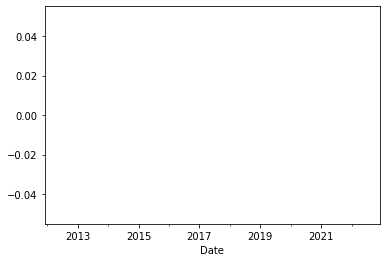

In [40]:
desvest_roll = r_nameD.rolling(window=252).std()
desvest_roll.plot()

b. Parkinson

In [41]:
preciosP = pdr.DataReader(['^RUT'], start, end, interval = '1mo').dropna()

[*********************100%***********************]  1 of 1 completed


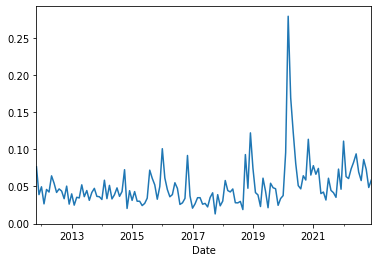

In [42]:
lnHL = np.log(preciosP["High"]/preciosP["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

In [43]:
# Volatilidad promedio anual
(sigmaPark_d.mean())*np.sqrt(252)

0.8128220594234592

In [44]:
# Volatilidad promedio mensual
(sigmaPark_d.mean())*np.sqrt(12)

0.17737231494466166

c. Garman-Klass

In [45]:
preciosGK = pdr.DataReader(['^RUT'], start, end, interval = '1mo').dropna()

[*********************100%***********************]  1 of 1 completed


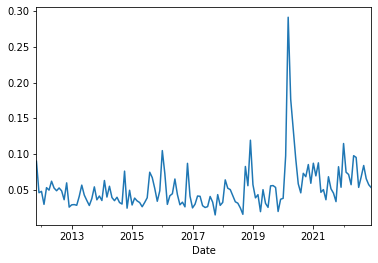

In [46]:
lnHL = np.log(preciosGK["High"]/preciosGK["Low"]).dropna()
lnCO = np.log(preciosGK["Close"]/preciosGK["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot()

In [47]:
# Volatilidad promedio anual
(sigmaGK_d.mean())*np.sqrt(252)

0.8362076247715705

In [48]:
# Volatilidad promedio mensual
(sigmaGK_d.mean())*np.sqrt(12)

0.18247546367690246